# McKinsey Analytics Competition July 20-22 2018

## Test Case / Problem Statement

The problem statement of this competition is seperated into two parts:

A) Determine the renewal probability P(x) ∈ [0,1] of a candidate for an insurance scheme based on the provided features of the dataset such as monthly income, cash/credit payments, payment delays, geographical, demographical, premiums

B) Establish and determine an incentive scheme for policy agencies to maximise the insurance company's profit. The net revenue relationship between the insurance provider and agencies was represented by a linear mathematical equation.

## My Approach

A valid attempt was made only for part A) of the competition. 

The approach utilised for part A consisted of first cleaning the data by imputing averages and eliminating, followed by deciding what features of the dataset is worth training for. A simple gradient boosting model xgboost was used to train the model to predict for the test data set.

As the sumbission requires two columns accompanying the 'id' feature of the test set 'renewal' and 'premium', a fixed value based on a personal estimate was set for all predictions of the 'premium' column as this was not attempted for a solution. 

## Results

Despite having only attempted half of the problem statement and submitting the submission csv. with one out of the two columns containing absolute garbage, a score accuracy of 70.46% was achieved on the public leaderboard with 1st place globally scoring an accuracy score of 72.96%. Additionally, a score accuracy of 75.8% was achieved on the private leaderboard with 1st place globally scoring 79.4%. 




## Solution


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

First step was to import relevant packages into python, followed by loading the data sets


In [96]:
df_test = pd.read_csv('data/test_data.csv')
df_train = pd.read_csv('data/train_data.csv')

Now we combine the two datasets into one so that we can start observing the data to get some sense out of it, followed by cleaning up impurities of the set:

In [97]:
combined_dataset = pd.concat([df_train, df_test])
combined_dataset.reset_index(drop = True, inplace=True)

Now lets observe the dataset:

In [98]:
combined_dataset.head(25)

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,sourcing_channel
0,0.0,0.0,0.0,355060,12058,99.02,110936,13,0.429,3300,1.0,Urban,C
1,0.0,0.0,0.0,315150,21546,99.89,41492,21,0.010,18000,1.0,Urban,A
2,2.0,3.0,1.0,84140,17531,98.69,31300,7,0.917,3300,0.0,Rural,C
3,0.0,0.0,0.0,250510,15341,99.57,19415,9,0.049,9600,1.0,Urban,A
4,0.0,0.0,0.0,198680,31400,99.87,99379,12,0.052,9600,1.0,Urban,B
5,2.0,0.0,0.0,282080,17527,99.18,59951,9,0.540,22200,1.0,Rural,B
6,0.0,0.0,0.0,118400,24829,99.05,54031,11,1.000,7500,1.0,Urban,B
7,1.0,6.0,4.0,180240,21911,99.33,94290,3,1.000,9600,0.0,Urban,A
8,0.0,0.0,0.0,92520,9868,99.58,93730,4,0.621,7500,1.0,Urban,A
9,2.0,0.0,0.0,107180,23008,98.91,84844,11,0.908,5400,0.0,Rural,A


In [99]:
combined_dataset.tail(25)

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,sourcing_channel
114052,0.0,0.0,0.0,400060,16798,99.31,52826,11,0.718,18000,NaN,Rural,A
114053,0.0,0.0,0.0,255040,16798,98.97,35994,8,0.000,30600,NaN,Urban,B
114054,0.0,0.0,0.0,73410,23735,99.20,1512,14,0.106,5400,NaN,Urban,A
114055,0.0,0.0,0.0,105040,23371,98.48,52077,20,0.292,7500,NaN,Urban,A
114056,0.0,0.0,0.0,90140,10225,99.35,95749,7,0.081,7500,NaN,Rural,B
114057,0.0,0.0,0.0,242540,12060,99.06,49946,11,0.040,3300,NaN,Urban,B
114058,0.0,0.0,0.0,132580,14973,99.02,66811,9,0.079,9600,NaN,Urban,C
114059,0.0,0.0,0.0,48060,27016,NaN,53438,10,0.005,1200,NaN,Rural,B
114060,0.0,0.0,0.0,467510,17161,99.65,24435,16,0.008,20100,NaN,Rural,D
114061,0.0,0.0,0.0,266240,14978,99.16,17848,8,0.368,13800,NaN,Rural,C


At first glance, there is not any noticeable NaN values in the training set. The NaN column visible in the test set is correct as that column 'renewal' is what we are predicting for using train.data, hence, there should be empty values in this column.


We will proceed to ensure this finding for all values in the set:

In [100]:
print(combined_dataset.describe(include ='all'))

        Count_3-6_months_late  Count_6-12_months_late  \
count           113949.000000           113949.000000   
unique                    NaN                     NaN   
top                       NaN                     NaN   
freq                      NaN                     NaN   
mean                 0.245689                0.078948   
std                  0.689892                0.442024   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                 13.000000               17.000000   

        Count_more_than_12_months_late        Income    age_in_days  \
count                    113949.000000  1.140770e+05  114077.000000   
unique                             NaN           NaN            NaN   
top                                NaN           NaN            NaN   
freq                           

In [101]:
print(combined_dataset.isnull().sum())

Count_3-6_months_late                 128
Count_6-12_months_late                128
Count_more_than_12_months_late        128
Income                                  0
age_in_days                             0
application_underwriting_score       4297
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
sourcing_channel                        0
dtype: int64


We can see that isnull() prints out a vast amount of NaN values for the application_underwriting_score. For the first three features of Count_Xmonths_late, it is only a very small amount when compared to the size of train data at 30000+ rows. 

Again as mentioned previously, the renewal should read a high number due to empty cells for the test set.


From the problem statement, it is known that only candidates that receive a application_underwriting_score over 90% (0.9) recieve a renewal of premium. Due to the amount of NaN values and a determined aspect of this feature to contain very little learning capability, we can proceed to drop the application_underwriting_score faster than Snoop Dogg dropped it like it was hot:

In [102]:
temp = combined_dataset
del combined_dataset['application_underwriting_score']

In [103]:
combined_dataset.head()

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,sourcing_channel
0,0.0,0.0,0.0,355060,12058,110936,13,0.429,3300,1.0,Urban,C
1,0.0,0.0,0.0,315150,21546,41492,21,0.010,18000,1.0,Urban,A
2,2.0,3.0,1.0,84140,17531,31300,7,0.917,3300,0.0,Rural,C
3,0.0,0.0,0.0,250510,15341,19415,9,0.049,9600,1.0,Urban,A
4,0.0,0.0,0.0,198680,31400,99379,12,0.052,9600,1.0,Urban,B


### Initial Observations and Remarks

Now that the one feature is erased, we can begin to start observing the dataset to extract any insights that might help with feature determination.

We do this through using seaborns heatmap with a correlation definition 

In [104]:
import matplotlib.pyplot as plt

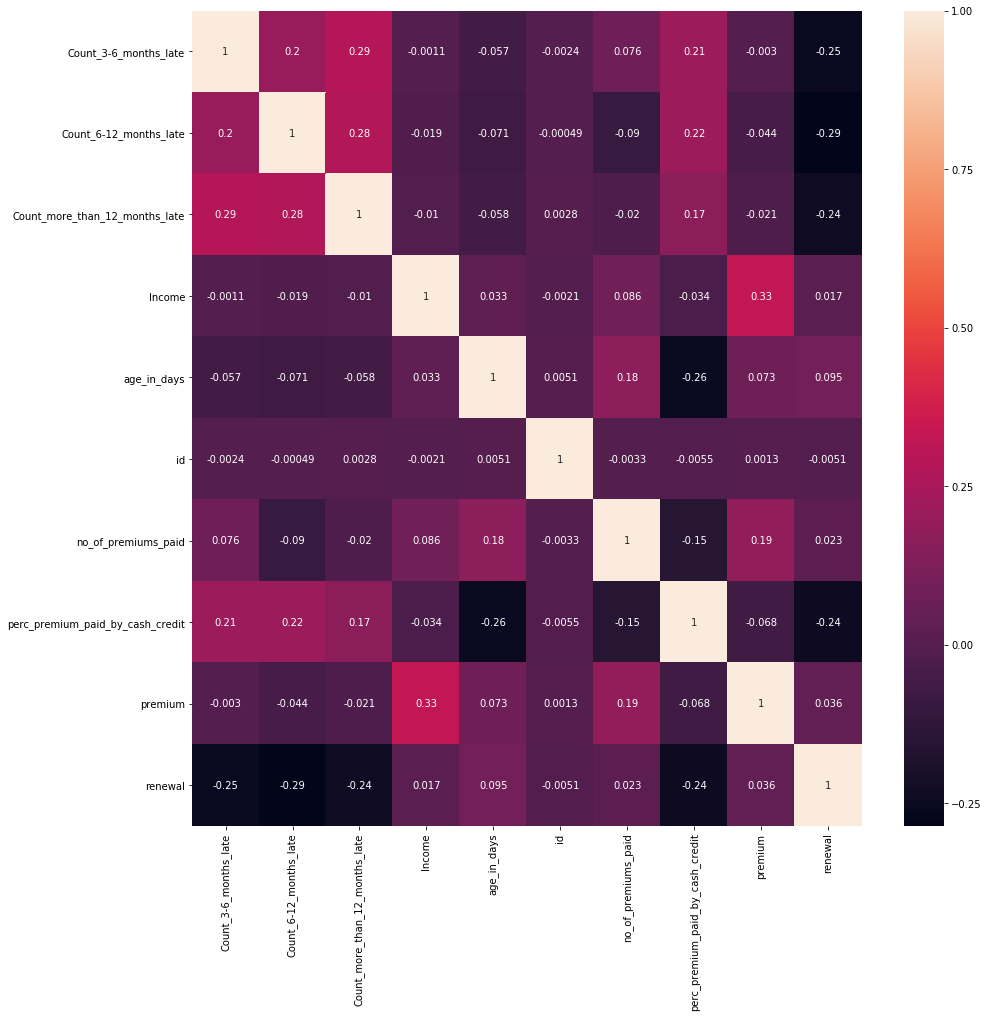

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(combined_dataset.corr(), annot=True)

Sadly, at first glance, the majority of the dataset does not employ high correlation factors between one another. The most notable correlation is between 'premium' and 'income' which in reality does make sense as a candidates income determines their ability to contribute to mandatory payments.



### Data Cleaning

From before, we know the features that contain NaN values include the first 3 columns consisting of the number of late month payments. From the heatmap, these features are second highest correlated to the renewal value, meaning there is a high potential to negatively influence the predictive model's accuracy if we do not treat these NaN values accordingly. 

We can go into great depth by determining the average of these values with associated features and assign data according to the NaN values respective features, however, as there is only 128/30000+ data rows, using the most occured value would be sufficient

In [106]:
def assign_data(combined_dataset):
    
    dates = ['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late']
    for feat in dates:
        mode = combined_dataset[feat].value_counts().index[0]
        combined_dataset[feat].fillna(mode, inplace=True)
        
    return combined_dataset


In [107]:
combined_dataset = assign_data(combined_dataset)

We can confirm using isnull() that all NaN values are sorted (excluding the renewal column which again makes up test data)

In [108]:
print(combined_dataset.isnull().sum())

Count_3-6_months_late                   0
Count_6-12_months_late                  0
Count_more_than_12_months_late          0
Income                                  0
age_in_days                             0
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
sourcing_channel                        0
dtype: int64


We could also double check the heatmap to compare the previous heatmaps to ensure there was not any radical changes in the process of data cleaning


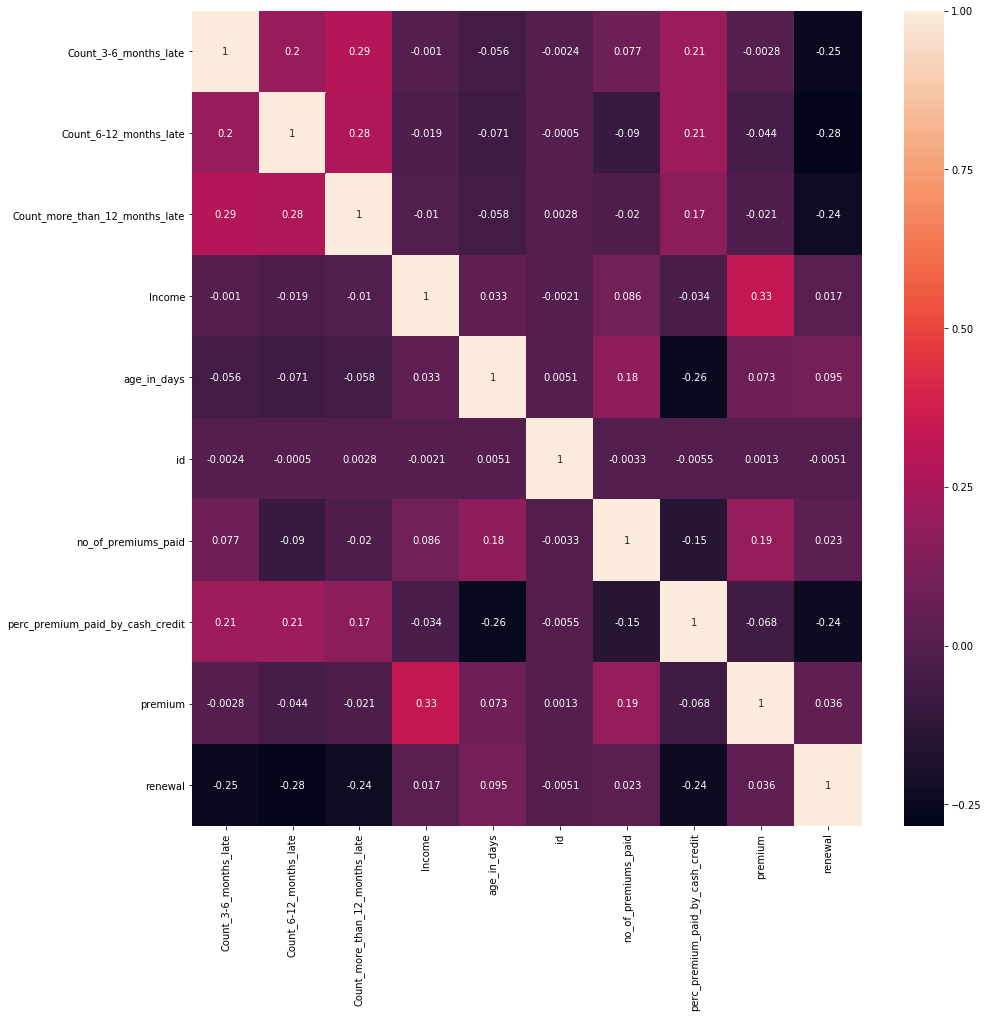

In [121]:
plt.figure(figsize=(15,15))
sns.heatmap(combined_dataset.corr(), annot=True)

By observing the heatmap, there was very minimal changes to the date features, where the second column only changed by a percentage of +0.01% when compard to our first computed heatmap


### Training the Predictive Model

In [110]:
import xgboost as xgb

As a gradient boosting learning technique has been employed, we import xgboost as the python package. 

We can now split the train and test data accordingly. Recall the test data contains NaN values due to renewal being empty cells as known. We can rely on this information to the the train_test_split.

Note we also drop ID as there is nothing to learn from this feature (in addition to rules stating to not include this column in training). 

In [111]:
def train_test_split(combined_dataset):
    predict_feature ='renewal'
    training_features = [feat for feat in combined_dataset.columns.tolist() 
                if feat !=  predict_feature and feat != 'residence_area_type' and feat !='id' 
                and feat != 'sourcing_channel' ]
    train_idx = combined_dataset[combined_dataset.renewal.notnull()].index.tolist()
    test_idx = combined_dataset[combined_dataset.renewal.isnull()].index.tolist()
    X_train = combined_dataset.ix[train_idx, training_features].values
    X_test = combined_dataset.ix[test_idx, training_features].values
    y_train = combined_dataset[predict_feature].ix[train_idx].values
    return X_train, X_test, y_train

In [112]:
X_train, X_test, y_train = train_test_split(combined_dataset)

We will now set the parameters for the training model including a random seed number:

In [113]:
seed_number = 1500

In [114]:
param = {'objective': 'binary:logistic',
    'min_child_weight': 10.0,
    'max_depth': 4,
    'colsample_bytree': 0.5,
    'subsample': 0.9,
    'eta': 0.02,
    'max_delta_step': 1.2,
    'eval_metric': 'auc',
    'seed': seed_number
        }

Note that max_depth was tested for values max_depth_1 > 4 > max_depth_2, where 4 yielded best score accuracy

In [115]:
#Setting the number of iterations for training the model

num_round = 500


We create a submission csv according to the submission structure required:

In [116]:
submission = pd.DataFrame()
submission['id'] = df_test['id'].values

Now to train the model:

In [117]:
d_train = xgb.DMatrix(X_train, y_train)
d_test = xgb.DMatrix(X_test)
model = xgb.train(param, d_train, num_round)

### Prediction Results

Once trained, we can predict using the best tree limit approach:

In [118]:
prediction = model.predict(d_test,ntree_limit=model.best_ntree_limit)

We can now extract results to the submission csv:

In [92]:
submission['renewal'] = prediction

For the incentives; part B of the hackathon, we assign a random fixed value for all results as this has not been attempted:

In [119]:
submission['incentives'] = 1600

As the submission csv value is completed, we can export out as a csv file using submission.to_csv() function